In [19]:
import numpy as np 
import pandas as pd 
from math import *
import matplotlib.pyplot as plt

In [1]:
#          U(x, t+1) = U(x, t) - CFL/2*(U(x+1, t+1) - U(x-1, t+1))
#          N = 41 , a = 0, b = 2 , CFL = 2 , discretize uptp 10 timesteps
#          U(0, t) =  1
#          U(x, 0) =  1 for x <= 0.5
#                  =  2 for x > 0.5 

In [6]:
# we have taken CFL to be original CFL/2
CFL = 1.0  
pre_matrix = []
p_row0 = []
p_row0.append(1)
for i in range(41):
    p_row0.append(0)
pre_matrix.append(p_row0)
for i in range(1, 42):
    p_row = []
    for j in range(42):
        if j == i-1:
            p_row.append(-CFL)
        elif j == i:
            p_row.append(1.0)
        elif j == i+1:
            p_row.append(CFL)
        else:
            p_row.append(0)
    pre_matrix.append(p_row)
#print(pre_matrix)
p_matrix = np.asarray(pre_matrix)
print(p_matrix)

[[ 1.  0.  0. ...  0.  0.  0.]
 [-1.  1.  1. ...  0.  0.  0.]
 [ 0. -1.  1. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  1.  1.  0.]
 [ 0.  0.  0. ... -1.  1.  1.]
 [ 0.  0.  0. ...  0. -1.  1.]]


In [7]:
matrix = np.linalg.inv(p_matrix)
print(matrix)

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 6.18033989e-01  6.18033989e-01 -3.81966011e-01 ...  7.46507383e-09
  -3.73253692e-09  3.73253692e-09]
 [ 3.81966011e-01  3.81966011e-01  3.81966011e-01 ... -7.46507383e-09
   3.73253692e-09 -3.73253692e-09]
 ...
 [ 7.46507383e-09  7.46507383e-09  7.46507383e-09 ...  4.72135955e-01
  -2.36067977e-01  2.36067977e-01]
 [ 3.73253692e-09  3.73253692e-09  3.73253692e-09 ...  2.36067977e-01
   3.81966011e-01 -3.81966011e-01]
 [ 3.73253692e-09  3.73253692e-09  3.73253692e-09 ...  2.36067977e-01
   3.81966011e-01  6.18033989e-01]]


In [14]:
u_0 = np.zeros((42))  # u_i is u vector at time i 
for i in range(42):
    if i*2/42 <= 0.5:
        u_0[i] = 1
    else:
        u_0[i] = 2
print(u_0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]


In [18]:
U = []
U.append(u_0)
for i in range(1, 11):
    j = i-1
    u_i = np.dot(matrix, U[j])
    U.append(u_i)
print(U)

[array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2.]), array([1.        , 1.00310563, 0.99689437, 1.00621125, 0.99068312,
       1.01552814, 0.97515498, 1.04037316, 0.93478182, 1.10559133,
       0.82919049, 1.27640085, 1.55278964, 1.7236112 , 1.82917844,
       1.89443276, 1.93474568, 1.95968709, 1.97505859, 1.98462849,
       1.9904301 , 1.9941984 , 1.9962317 , 1.9979667 , 1.998265  ,
       1.9997017 , 1.99856329, 2.00113841, 1.99742489, 2.00371352,
       1.99371136, 2.01000216, 1.9837092 , 2.02629296, 1.95741624,
       2.06887672, 1.88853952, 2.1803372 , 1.70820232, 2.47213488,
       1.23606744, 3.23606744]), array([1.        , 1.01474727, 0.98835835, 1.02328329, 0.97128632,
       1.04268009, 0.94413436, 1.07370071, 0.91080681, 1.09767572,
       0.91872242, 1.00814379, 1.18697948, 1.37395395, 1.53663673,
       1.66649567, 1.76457382, 1.83666

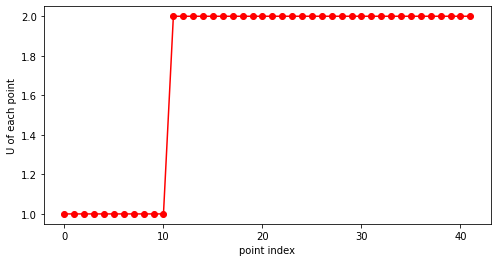

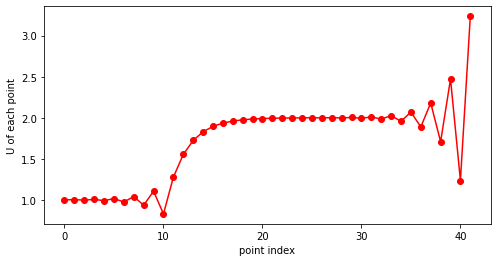

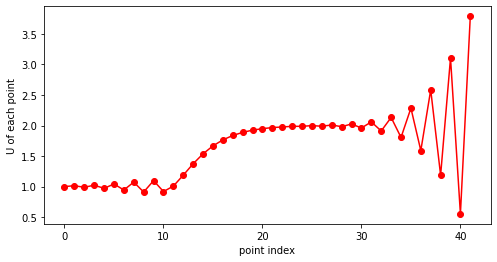

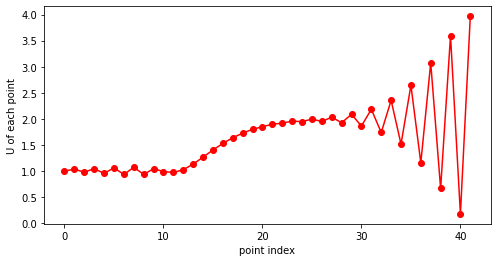

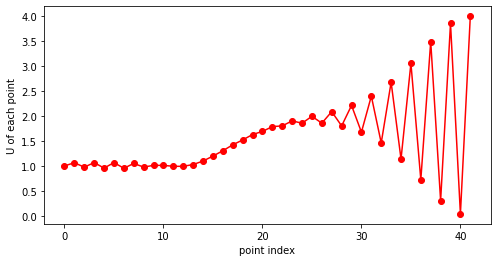

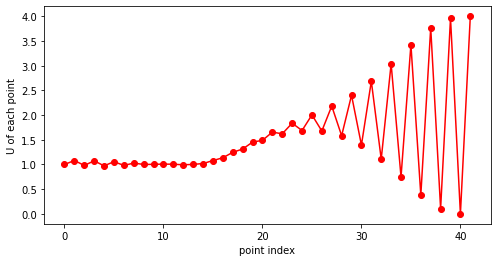

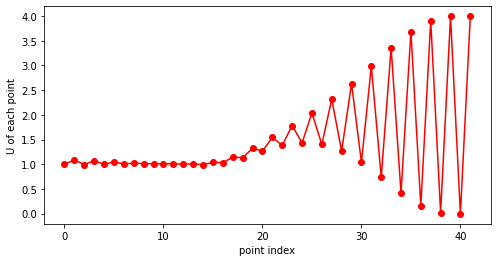

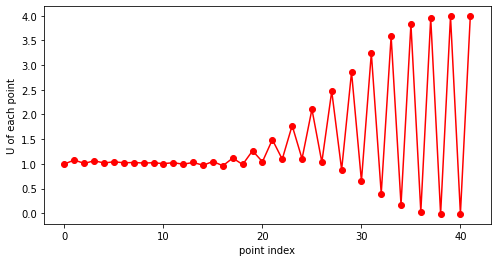

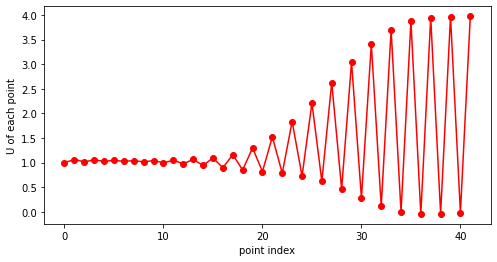

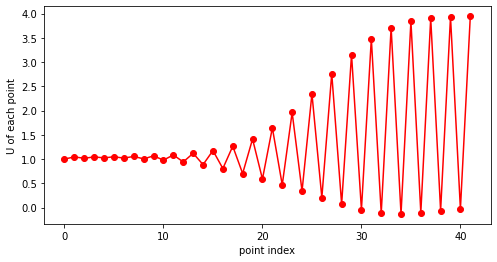

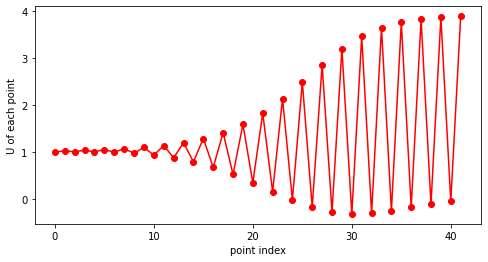

In [25]:
import time
u_x = [i for i in range(42)]
for i in range(11):
    u_y = U[i]
    fig , ax = plt.subplots(figsize = (8,4))
    plt.xlabel("point index")
    plt.ylabel("U of each point")
    plt.plot(u_x, u_y, 'ro-')
    #time.sleep(5)